# Homework 6a: PDE
Physics 177, Spring 2018  
**Due:** Thursday, May 10

*James Griffith*

## Problem 1: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density. Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW6a_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be. 

In [13]:
import numpy as np

# Constants
grid = 20   # grid points per side of small square
M = 5*grid  # grid squares per side (units of grid)

V = 1.0        # boundary potential from the charge
target = 1e-2  # target accuracy


def InSouthWestBox(i,j):
    """true if point is in the Southwest box"""
    if (i >= 20) and (i < 40) and (j >= 20) and (j < 40):
        return True
    else:
        return False
    

def InNorthEastBox(i,j):
    """true if point is in the Northwest box"""
    if (i >= 60) and (i < 80) and (j >= 60) and (j < 80):
        return True
    else:
        return False
    
    
    
def AmIFixed(i,j):
    """true if this block shouldn't be updated"""
    # BIG BOUNDARY
    if i==0 \
    or i==M \
    or j==0 \
    or j==M \
    or InSouthWestBox(i,j) \
    or InNorthEastBox(i,j):
        return True
    else:
        return False
    

# Fill initial array with zeros
phi =  np.zeros([M+1, M+1],float)


# Fill initial array with charged sub-boxes
for i in range(M+1):
    for j in range(M+1):
        if InSouthWestBox(i,j):
            phi[i,j] = -V    # FILL THIS IN
        elif InNorthEastBox(i,j):
            phi[i,j] = V     # FILL THIS IN
        else:
            phi[i,j] = 0



# initialize "work in progess" array
phiprime = np.zeros([M+1, M+1],float) # container for new values
        

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if AmIFixed(i,j):
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phiprime[i+1, j] + phiprime[i-1, j] + phiprime[i, j + 1] + phiprime[i, j - 1])/4
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi

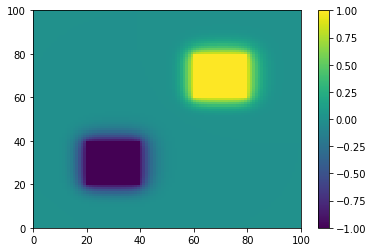

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# You should stop to understand what's going on here.

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()

## Problem 2: 4D spheres

Using Monte Carlo, estimate the volume enclosed by a 4D sphere. You can get a reasonable value by sampling 100,000 points.

In [15]:
d = 1

N = 1000000
Nhits = 0

radius = 1
area = 0

import random


for i in range(N):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    z = random.uniform(-1,1)
    w = random.uniform(-1,1)
    
    if ((x**2 + y**2 + z**2 + w**2)<(radius**2)):
        Nhits += 1


area = (Nhits/N)*(2**4)
print(area)

4.924256


The expected value is 4.9348, which is $\ 1/2 pi^2 r^4 $ ,  Iodon't want to write out the gamma version :P

## X. Extra Credit, compare to the correct value

Look up the volume of a 4-dimensional sphere (it's written with respect to the Euler $\Gamma$ function). Using `scipy.special.gamma`, confirm that the value you found in **Problem 2** is reasonable. 

In [16]:
from scipy.special import gamma as gamma
from math import pi

n = 4
r = 1

print((pi**(n/2))/(gamma((n/2)+1))*r**n)


# FILL THIS IN

4.934802200544679


Yeah boy, i did it :)